In [ ]:
#pip install gensim

In [3]:
pip install pulearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install imblearn

In [ ]:
#pip install -U octis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import csv
from sys import stdin
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import asyn_lpa_communities
from networkx.algorithms.community import modularity
#from cdlib import algorithms, readwrite, viz
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn import preprocessing
import sklearn.metrics as sk_metrics
import seaborn as sns

In [5]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('resultado_pecanpy.emb')

In [ ]:
#print(model)

In [6]:
node_embeddings = (model.vectors)
print(node_embeddings)

[[ 1.51634648e-01  1.30616743e-02  4.85435501e-03 ... -1.63539022e-01
   1.70814499e-01 -1.81490183e-01]
 [-1.11903157e-02 -2.51307338e-01  2.74289966e-01 ...  1.05302684e-01
   1.04468845e-01 -1.84717819e-01]
 [ 1.54857546e-01  2.50112353e-04 -2.00281814e-01 ... -2.81648755e-01
   7.66551346e-02 -4.25969929e-01]
 ...
 [ 6.42811432e-02  2.53454433e-03  3.39263603e-02 ... -1.07834823e-01
   1.46189019e-01 -1.41999722e-01]
 [ 4.69204336e-02 -1.00002643e-02  6.96792603e-02 ... -1.50781095e-01
   1.73385471e-01 -1.57344654e-01]
 [ 3.73166762e-02  6.81981118e-03  6.76245019e-02 ... -1.10466123e-01
   7.58624449e-02 -1.95623890e-01]]


In [7]:
train_csv = "train.csv"
train_data = pd.read_csv(train_csv)
train_data

,Id,Colorrectal
0,7316,0
1,2624,1
2,2033,0
3,10664,0
4,7157,1
...,...,...
17779,139221,0
17780,57636,0
17781,286749,0
17782,105375355,0


In [8]:
train_data['Colorrectal'] = train_data['Colorrectal'].astype('int')

In [9]:
train_csv2 = "attempt2.csv"
train_data2 = pd.read_csv(train_csv2)
train_data2 = train_data2.loc[:, train_data2.columns != 'alias']
train_data2

,BetweennessCentrality,ClosenessCentrality,Degree
0,0.254290,0.568801,5198
1,0.022499,0.462449,1369
2,0.019190,0.469221,1124
3,0.037382,0.452459,1361
4,0.007169,0.455402,762
...,...,...,...
17779,0.000000,0.286181,1
17780,0.000000,0.289060,1
17781,0.000000,0.305398,1
17782,0.000000,0.271662,1


In [10]:
# X will hold the 128-dimensional input features

X = node_embeddings
X=pd.DataFrame(X)
X = pd.concat([X, train_data2], axis=1)
#scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.StandardScaler()
#scaler.fit(X)
#X = pd.DataFrame(scaler.transform(X))
#X = X.to_numpy()
# y holds the corresponding target values
y = train_data['Colorrectal']
#lab_enc = preprocessing.LabelEncoder()
#y = lab_enc.fit_transform(y)

In [ ]:
print(X)

              0         1         2         3         4         5         6  \
0      0.151635  0.013062  0.004854  0.017251 -0.085164  0.013671 -0.003275   
1     -0.011190 -0.251307  0.274290  0.036882 -0.001503 -0.042619 -0.111164   
2      0.154858  0.000250 -0.200282  0.113379 -0.119130 -0.207601  0.174705   
3      0.443318 -0.443277 -0.558782 -0.166157 -0.445005 -0.209983 -0.046623   
4      0.100073  0.031023 -0.141208 -0.232731 -0.214743 -0.068555  0.076206   
...         ...       ...       ...       ...       ...       ...       ...   
17779  0.114422 -0.069040 -0.059414  0.035120 -0.149491  0.125160  0.078211   
17780  0.106038  0.025294  0.088607 -0.008283 -0.088605  0.089271  0.069252   
17781  0.064281  0.002535  0.033926 -0.038443 -0.045950  0.073360  0.028826   
17782  0.046920 -0.010000  0.069679 -0.035994 -0.100774  0.084347  0.028911   
17783  0.037317  0.006820  0.067625  0.012590 -0.055755  0.044795  0.010922   

              7         8         9  ...       121 

In [ ]:
print(y)

0        0
1        1
2        0
3        0
4        1
        ..
17779    0
17780    0
17781    0
17782    0
17783    0
Name: Colorrectal, Length: 17784, dtype: int32


In [11]:
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
# Keep the original targets safe for later
X2 = X.copy()
scaler.fit(X2)
X2 = pd.DataFrame(scaler.transform(X))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


**Random forest**

In [12]:
from pulearn import BaggingPuClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
estimator = RandomForestClassifier(
            #n_estimators=1000,
            criterion='gini',
            bootstrap=True
        )
#estimator =  RandomForestClassifier()
#estimator = LogisticRegression(random_state=0,max_iter=500)

pu_estimator = BaggingPuClassifier(
    #DecisionTreeClassifier(), 
    base_estimator=estimator,
    n_estimators = 1000,  # 10000 trees as usual
    max_samples = sum(y), # Balance the positives and unlabeled in each bag
    n_jobs = -1,           # Use all cores
    bootstrap=True
)

In [ ]:
pu_estimator.fit(X2, y)

BaggingPuClassifier(base_estimator=RandomForestClassifier(), max_samples=85,
                    n_estimators=1000, n_jobs=-1)

In [ ]:
y_pred = pu_estimator.predict(X2)
pu_estimator.score(X2, y)

0.789923526765632

In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y, y_pred)

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.8944573139725408

In [ ]:
#Calculo de las metricas Precision, Recall, F1-score 
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     17699
           1       0.02      1.00      0.04        85

    accuracy                           0.79     17784
   macro avg       0.51      0.89      0.46     17784
weighted avg       1.00      0.79      0.88     17784



In [ ]:
prob_a = pu_estimator.predict_proba(X)[:,1]
print(prob_a)

[0.44204 0.42538 0.40804 ... 0.32326 0.32145 0.32074]


In [ ]:
prob_aa = prob_a.copy()
for i in range(len(prob_aa)):
  
    # replace hardik with shardul
    if prob_aa[i] >=.9:
        prob_aa[i] = 1
    elif prob_aa[i] <.9:
        prob_aa[i] = 0
print(prob_aa)
sum(prob_aa)

[0. 0. 0. ... 0. 0. 0.]


0.0

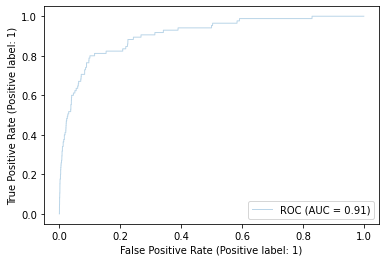

In [ ]:
fig, ax = plt.subplots()
sk_metrics.plot_roc_curve(pu_estimator, X, y, name='ROC', alpha=0.3, lw=1, ax=ax)

<AxesSubplot:>

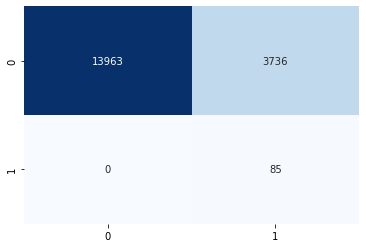

In [ ]:
mat, ax_mat = plt.subplots()
cmap = plt.get_cmap('Blues')
cm = sk_metrics.confusion_matrix(y, y_pred)
sns.heatmap(cm, cmap=cmap, annot=True, fmt='g', ax=ax_mat, cbar=False)

#SCALING THEM #https://roywrightme.wordpress.com/2017/11/16/positive-unlabeled-learning/
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [ ]:
X2

**K-vecinos**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
arr_pred = []
maxim_score = -1
KpredictionSelected = None 
for i in range(3,19):
  knc = KNeighborsClassifier(n_neighbors=i)
  knc.fit(X2, y)
  Kprediction = knc.predict(X2)
  score = knc.score(X2, y)
  arr_pred.append(knc.score(X2, y))
  if score > maxim_score:
    maxim_score = score
    KpredictionSelected = Kprediction
    
 
print("la mejor predicción es: ", maxim_score)
print("con el mejor n_neighbor siendo", arr_pred.index(maxim_score) +  3)


la mejor predicción es:  0.9954453441295547
con el mejor n_neighbor siendo 3


In [14]:
estimator = KNeighborsClassifier(n_neighbors=3)

pu_estimator2 = BaggingPuClassifier(
    base_estimator=estimator,
    n_estimators = 1000,  # 10000 trees as usual
    max_samples = sum(y), # Balance the positives and unlabeled in each bag
    n_jobs = -1,           # Use all cores
    bootstrap=True
)

pu_estimator2.fit(X2, y)

BaggingPuClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                    max_samples=85, n_estimators=1000, n_jobs=-1)

In [15]:
y_pred2 = pu_estimator2.predict(X2)
pu_estimator2.score(X2, y)

0.9877980206927576

In [16]:
#Calculo de las metricas Precision, Recall, F1-score 
from sklearn.metrics import classification_report
print(classification_report(y,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17699
           1       0.18      0.42      0.25        85

    accuracy                           0.99     17784
   macro avg       0.59      0.71      0.62     17784
weighted avg       0.99      0.99      0.99     17784



In [17]:
#Metricas de la Matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Confusion_matrix = confusion_matrix(y_pred2, y)
Confusion_matrix

array([[17531,    49],
       [  168,    36]])

**Regresión logística
**

In [19]:
from sklearn.svm import SVC
from pulearn import BaggingPuClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#estimator = SVC(C=10, kernel='rbf', gamma=0.4, probability=True)
estimator = LogisticRegression(random_state=0,max_iter=500)


pu_estimator2 = BaggingPuClassifier(
    base_estimator=estimator,
    n_estimators = 1000,  # 10000 trees as usual
    max_samples = sum(y), # Balance the positives and unlabeled in each bag
    n_jobs = -1,           # Use all cores
    bootstrap=True
)

pu_estimator2.fit(X2, y)

BaggingPuClassifier(base_estimator=LogisticRegression(max_iter=500,
                                                      random_state=0),
                    max_samples=85, n_estimators=1000, n_jobs=-1)

In [20]:
y_pred2 = pu_estimator2.predict(X2)
pu_estimator2.score(X2, y)

0.8466036887089519

In [21]:
#Calculo de las metricas Precision, Recall, F1-score 
from sklearn.metrics import classification_report
print(classification_report(y,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     17699
           1       0.03      1.00      0.06        85

    accuracy                           0.85     17784
   macro avg       0.52      0.92      0.49     17784
weighted avg       1.00      0.85      0.91     17784



In [22]:
#Metricas de la Matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Confusion_matrix = confusion_matrix(y_pred2, y)
Confusion_matrix

array([[14971,     0],
       [ 2728,    85]])

In [ ]:
prob_a2 = pu_estimator2.predict_proba(X2)[:,1]
print(prob_a2)


[0.95783206 0.99616338 0.99106719 ... 0.00510063 0.0016691  0.00206556]


In [ ]:
prob_a3 = prob_a2.copy()
for i in range(len(prob_a3)):
  
    # replace hardik with shardul
    if prob_a3[i] >=.9:
        prob_a3[i] = 1
    elif prob_a3[i] <.9:
        prob_a3[i] = 0
print(prob_a3)
sum(prob_a3)

[1. 1. 1. ... 0. 0. 0.]


513.0

In [ ]:
import pandas as pd
df = pd.DataFrame(prob_a3) 
    
# saving the dataframe 
df.to_csv('LOG_REG.csv') 

In [ ]:
#from pulearn import BaggingPuClassifier
#from sklearn.svm import SVC
#estimator = SVC(C=10, kernel='rbf', gamma=0.4, probability=True)
#estimator = LogisticRegression(random_state=0,max_iter=500)


#pu_estimator3 = BaggingPuClassifier(
#    base_estimator=estimator,
#    n_estimators = 1000,  # 10000 trees as usual
#    max_samples = sum(y), # Balance the positives and unlabeled in each bag
#    n_jobs = -1,           # Use all cores
#    bootstrap=True
#)

#pu_estimator3.fit(X2, y)

In [ ]:
#y_pred3 = pu_estimator3.predict(X2)
#pu_estimator3.score(X2, y)

In [ ]:
##Calculo de las metricas Precision, Recall, F1-score 
#from sklearn.metrics import classification_report
#print(classification_report(y,y_pred3))

**Análisis discriminante lineal**

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pulearn import BaggingPuClassifier
#estimator = SVC(C=10, kernel='rbf', gamma=0.4, probability=True)
#estimator = LogisticRegression(random_state=0,max_iter=500)
estimator = LinearDiscriminantAnalysis()

pu_estimator4 = BaggingPuClassifier(
    base_estimator=estimator,
    n_estimators = 1000,  # 10000 trees as usual
    max_samples = sum(y), # Balance the positives and unlabeled in each bag
    n_jobs = -1,           # Use all cores
    bootstrap=True
)

pu_estimator4.fit(X2, y)

BaggingPuClassifier(base_estimator=LinearDiscriminantAnalysis(), max_samples=85,
                    n_estimators=1000, n_jobs=-1)

In [24]:
y_pred4 = pu_estimator4.predict(X2)
pu_estimator4.score(X2, y)

0.8270917678812416

In [25]:
#Calculo de las metricas Precision, Recall, F1-score 
from sklearn.metrics import classification_report
print(classification_report(y,y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90     17699
           1       0.03      1.00      0.05        85

    accuracy                           0.83     17784
   macro avg       0.51      0.91      0.48     17784
weighted avg       1.00      0.83      0.90     17784



In [26]:
#Metricas de la Matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Confusion_matrix = confusion_matrix(y_pred2, y)
Confusion_matrix

array([[14971,     0],
       [ 2728,    85]])

In [ ]:
prob_a4 = pu_estimator4.predict_proba(X2)[:,1]
print(prob_a4)

[1.19001537e-01 9.99970551e-01 7.98079223e-01 ... 1.09830875e-03
 2.66798117e-07 1.78987816e-06]


In [ ]:
prob_a4a = prob_a4.copy()
for i in range(len(prob_a3)):
  
    # replace hardik with shardul
    if prob_a4a[i] >=.9:
        prob_a4a[i] = 1
    elif prob_a4a[i] <.9:
        prob_a4a[i] = 0
print(prob_a4a)
sum(prob_a4a)

[0. 1. 0. ... 0. 0. 0.]


166.0

In [ ]:
import pandas as pd
df = pd.DataFrame(prob_a4a) 
    
# saving the dataframe 
df.to_csv('LinearDiscriminantAnalysis.csv') 

#bagging all resampled

In [ ]:
#gsmote = GeometricSMOTE(random_state=1,selection_strategy='minority')
#X_res_all, y_res_all = gsmote.fit_resample(X2, y)
#print('Resampled dataset shape %s' % Counter(y_res_all))

from sklearn.ensemble import BaggingClassifier

#estimator = LogisticRegression(random_state=0,max_iter=500)
estimator=RandomForestClassifier(n_estimators=1000, bootstrap= 1000)
pu_estimator_10 = BaggingClassifier(
    base_estimator=estimator,
    n_estimators = 1000,  # 10000 trees as usual
    max_samples = sum(y_res_all), # Balance the positives and unlabeled in each bag
    n_jobs = -1,           # Use all cores
    bootstrap=True
)

pu_estimator_10.fit(X_res_all, y_res_all)

y_pred=pu_estimator_10.predict(X_test)
pu_estimator_10.score(X_test, y_test)

In [ ]:
X3 = X2.copy()
X3 = pd.DataFrame(X3)
X3 = X3.reset_index(drop=True) 
X3

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,0.228714,0.068355,-0.126285,0.413165,0.030908,-0.552076,-0.314409,0.311720,-0.238841,-0.057159,...,0.161303,-0.481682,0.674604,-0.398910,0.010172,-0.185839,-0.045171,125.797090,6.233123,73.366826
1,-0.609610,-1.374051,1.271163,0.517855,0.471138,-0.873043,-0.907810,0.674005,0.450675,-0.031597,...,-0.923188,-0.921229,0.054083,1.050814,1.410505,-0.538887,-0.063402,11.079486,3.374657,19.022023
2,0.245307,-0.001545,-1.190239,0.925788,-0.147823,-1.813772,0.664494,-1.373967,-1.348548,2.168353,...,-0.690776,0.470083,1.294294,0.344891,-0.605034,-0.686893,-1.426076,9.441672,3.556675,15.544751
3,1.730479,-2.421443,-3.049629,-0.564890,-1.862584,-1.827354,-0.552829,0.050562,0.495139,0.007179,...,0.821738,-0.182847,-0.591001,0.705464,0.699766,0.738822,1.073110,18.445367,3.106165,18.908480
4,-0.036755,0.166352,-0.883846,-0.919911,-0.650941,-1.020929,0.122739,0.586151,-0.375286,0.906461,...,0.997723,0.878809,-0.768087,-0.618433,-0.907066,-0.940703,-0.451313,3.492299,3.185267,10.406903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17779,0.037119,-0.379595,-0.459617,0.508457,-0.307579,0.083638,0.133766,0.180998,-0.451886,0.162409,...,0.539555,-0.052350,-0.219352,0.236992,0.283164,-0.490594,0.489912,-0.055826,-1.362938,-0.393931
17780,-0.006047,0.135095,0.308105,0.277003,0.012801,-0.121005,0.084494,0.217148,-0.287227,-0.062819,...,0.400192,-0.121686,0.520601,-0.117536,0.122840,-0.407608,0.455635,-0.055826,-1.285545,-0.393931
17781,-0.221036,0.010919,0.024499,0.116169,0.237253,-0.211727,-0.137853,0.310252,-0.107400,-0.024500,...,0.097793,-0.249102,-0.038975,0.065587,0.300322,-0.316880,0.177884,-0.055826,-0.846446,-0.393931
17782,-0.310420,-0.057472,0.209935,0.129229,-0.051230,-0.149077,-0.137386,0.383638,-0.469226,-0.087323,...,0.165274,-0.015845,-0.089696,-0.312024,0.076625,-0.172158,0.091211,-0.055826,-1.753166,-0.393931


In [ ]:
from pulearn import BaggingPuClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
pu_estimator_d3 = BaggingPuClassifier(
    base_estimator= DecisionTreeClassifier(), 
    #RandomForestClassifier(n_estimators=1000, bootstrap= 1000),#
    n_estimators = 10000,  # 10000 trees as usual
    max_samples = sum(y), # Balance the positives and unlabeled in each bag
    n_jobs = -1,           # Use all cores
    bootstrap=True
)

In [ ]:
pu_estimator_d3.fit(X3, y)

BaggingPuClassifier(base_estimator=DecisionTreeClassifier(), max_samples=85,
                    n_estimators=10000, n_jobs=-1)

In [ ]:
#https://roywrightme.wordpress.com/2017/11/16/positive-unlabeled-learning/
ys = 2 * y - 1
prob_d3 = pu_estimator_d3.predict_proba(X3)[:,1]
print(prob_d3)

[9.269e-01 1.000e+00 8.176e-01 ... 0.000e+00 4.000e-04 2.000e-04]


In [ ]:
range_P = [min(prob_d3 * (ys > 0)), max(prob_d3 * (ys > 0))]

In [ ]:
iP_new = ys[(ys < 0) & (prob_d3 >= range_P[1])].index
iN_new = ys[(ys < 0) & (prob_d3 <= range_P[0])].index
ys.loc[iP_new] = 1
ys.loc[iN_new] = 0

In [ ]:
rf2 = DecisionTreeClassifier()
#RandomForestClassifier(n_estimators = 1000, n_jobs = -1)


In [ ]:
for i in range(20):
    # If step 1 didn't find new labels, we're done
    if len(iP_new) + len(iN_new) == 0 and i > 0:
        break
    print(
        'Step 1 labeled %d new positives and %d new negatives.'
         % (len(iP_new), len(iN_new))
    )
    print('Doing step 2... ', end = '')

    # Retrain on new labels and get new scores
    rf2.fit(X3, ys)
    pred33 = rf2.predict_proba(X3)[:,-1]

    # Find the range of scores given to positive data points
    range_P = [min(pred33 * (ys > 0)), max(pred33 * (ys > 0))]

    # Repeat step 1
    iP_new = ys[(ys < 0) & (pred33 >= range_P[1])].index
    iN_new = ys[(ys < 0) & (pred33 <= range_P[0])].index
    ys.loc[iP_new] = 1
    ys.loc[iN_new] = 0

Step 1 labeled 0 new positives and 149 new negatives.
Doing step 2... Step 1 labeled 0 new positives and 17550 new negatives.
Doing step 2... 

In [ ]:
results = y.copy()
results=pd.DataFrame(results)
results['output_stp'] = pred33

print(results)


       Colorrectal  output_stp
0                0         0.0
1                1         1.0
2                0         0.0
3                0         0.0
4                1         1.0
...            ...         ...
17779            0         0.0
17780            0         0.0
17781            0         0.0
17782            0         0.0
17783            0         0.0

[17784 rows x 2 columns]


In [ ]:
y_pred2step = rf2.predict(X3)
rf2.score(X3, y)

1.0

In [ ]:
#Calculo de las metricas Precision, Recall, F1-score 
from sklearn.metrics import classification_report
print(classification_report(y,y_pred2step))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17699
           1       1.00      1.00      1.00        85

    accuracy                           1.00     17784
   macro avg       1.00      1.00      1.00     17784
weighted avg       1.00      1.00      1.00     17784



https://github.com/AaronWard/PU-learning-example/blob/master/pu-learner.ipynb

In [ ]:
#
# https://gist.github.com/zachguo/10296432
#
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]) + 4
    empty_cell = " " * columnwidth
    print("    " + empty_cell, end=' ')
    for label in labels:
        print("%{0}s".format(columnwidth) % 'pred_' + label, end=" ")
    print()

    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % 'true_' + label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            if cell:
                print(cell, end=" ")
        print()
        
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('---- {} ----'.format('PU Bagging'))
print(print_cm(confusion_matrix(y, pu_estimator_d3.predict(X3)), labels=['negative', 'positive']))
print('')
print('Precision: ', precision_score(y, pu_estimator_d3.predict(X3)))
print('Recall: ', recall_score(y, pu_estimator_d3.predict(X3)))
print('Accuracy: ', accuracy_score(y, pu_estimator_d3.predict(X3)))

---- PU Bagging ----
                        pred_negative        pred_positive 
           true_negative      13627.0       4072.0 
           true_positive          0.0         85.0 
None

Precision:  0.020447438056290596
Recall:  1.0
Accuracy:  0.771030139451192


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('---- {} ----'.format('TSA'))
y_hat_val = rf2.predict(X3)
y_hat_val = [x if ((x==0) or (x==1)) else 0 for x in y_hat_val]
print(print_cm(confusion_matrix(y, y_hat_val), labels=['negative', 'positive']))
print('')
print('Precision: ', precision_score(y, y_hat_val))
print('Recall: ',    recall_score(y, y_hat_val))
print('Accuracy: ',  accuracy_score(y, y_hat_val))

---- TSA ----
                        pred_negative        pred_positive 
           true_negative      17699.0          0.0 
           true_positive          0.0         85.0 
None

Precision:  1.0
Recall:  1.0
Accuracy:  1.0


In [ ]:
print(classification_report(y,pu_estimator_d3.predict(X3)))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     17699
           1       0.02      1.00      0.04        85

    accuracy                           0.77     17784
   macro avg       0.51      0.88      0.46     17784
weighted avg       1.00      0.77      0.87     17784



In [ ]:
print(classification_report(y,y_hat_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17699
           1       1.00      1.00      1.00        85

    accuracy                           1.00     17784
   macro avg       1.00      1.00      1.00     17784
weighted avg       1.00      1.00      1.00     17784



In [ ]:
results['y_pred2step'] = y_pred2step

In [ ]:
results.to_csv("out.csv")

In [ ]:
print(pred33)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
pred33a = pred33.copy()
for i in range(len(pred33a)):
  
    # replace hardik with shardul
    if pred33a[i] >=.9:
        pred33a[i] = 1
    elif pred33a[i] <.9:
        pred33a[i] = 0
print(pred33a)
sum(pred33a)

[0. 1. 0. ... 0. 0. 0.]


85.0

In [ ]:
import pandas as pd
df = pd.DataFrame(pred33a) 
    
# saving the dataframe 
df.to_csv('twosteps.csv') 